In [3]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from datetime import datetime
import math
#### -----------------------CONVECTIVO
nc = netCDF4.Dataset("/home/l/Downloads/BAM1D_PKlast_avaliacao/BAM1D_avaliacao/saidas_figuras/bam1d.nc")
temp = np.squeeze(nc.variables["temp"][306])#-273.15
#print(temp)
press = np.squeeze(nc.variables["lev"][:])*1000
#print(press)
q = np.squeeze(nc.variables["umes"][306])#*100
mix = np.squeeze(nc.variables['liqm'][306])
#### -----------------------NÃO CONVECTIVO
temp1 = np.squeeze(nc.variables["temp"][313])#-273.15
#print(temp)
press1 = np.squeeze(nc.variables["lev"][:])*1000
#print(press)
q1 = np.squeeze(nc.variables["umes"][313])#*100
mix1 = np.squeeze(nc.variables['liqm'][313])


In [4]:
# -----------------
# VARIÁVEIS -------
# -----------------
cp = 1004.0  # calor específico do ar seco
p0 = 1000.0  # pressão inicial 
Rd = 287.058 # constante do gás para o ar seco
Rv = 461.5 # constante do gás para o vapor d'água
epsilon = Rd/Rv # razão das constantes do gás
L = 2.5e6 # calor latente de vaporização
T0 = 273.15  # Temperatura de referência (K)
Tl = 273.16  # Temperatura de fusão da água (K)


# Temperatura Potencial

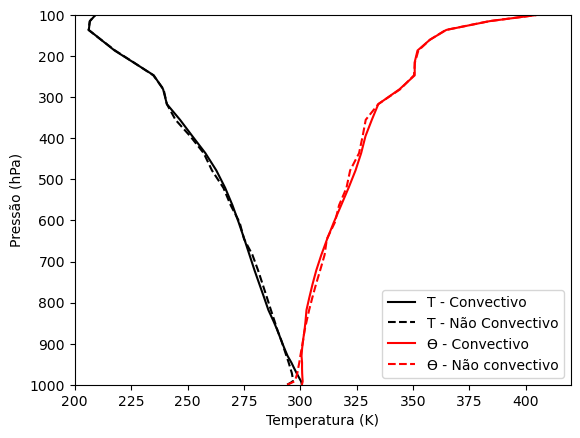

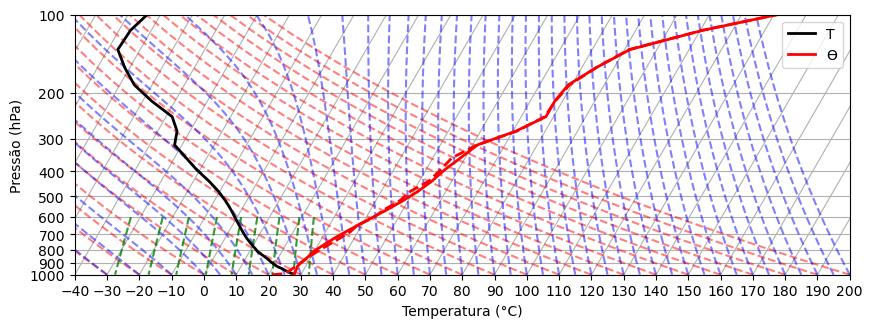

In [12]:
# Convectivo
temperaturaC = temp - 273.15
theta = temp * (1000 / press) ** 0.286
thetaC = theta -273.15
# Não convectivo
theta1 = temp1 * (1000 / press1) ** 0.286
thetaC1 = theta1 -273.15

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(temp, press,'black', label = 'T - Convectivo')
plt.plot(temp1, press,'black',linestyle='dashed', label = 'T - Não Convectivo')

plt.plot(theta, press,'r', label = '\u03F4 - Convectivo')
plt.plot(theta1, press,'r',linestyle='dashed', label = '\u03F4 - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(200,420)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, temperaturaC, 'black', linewidth=2)
skew.plot(press, thetaC, 'r', linewidth=2)
skew.plot(press, thetaC1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 200) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['T', '\u03F4'])
skew.ax.set_xlabel('Temperatura (°C)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


# Temperatura Potencial Virtual

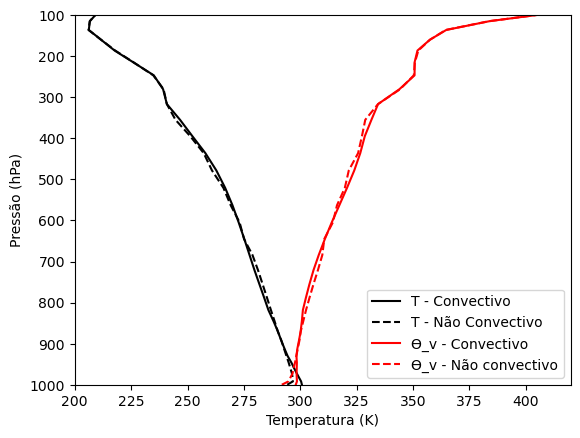

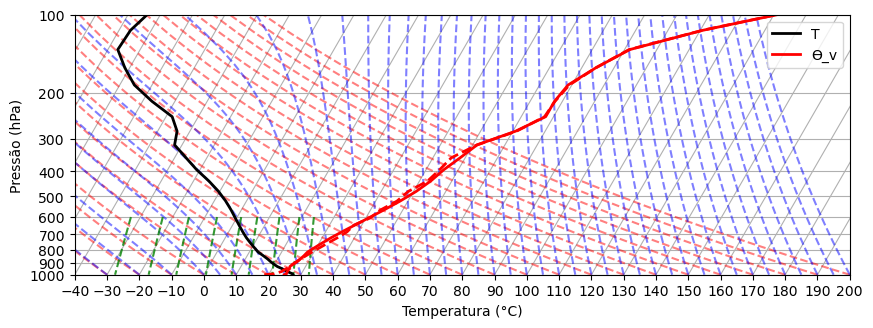

In [128]:
# Convectivo
e = press * (q / (q + 0.622))
tpv = (e / press) * (1 - 0.622)
temp_v = temp * (1 - tpv)
#temp_v = temp * (((1 + Rv) / epsilon) / (1 + Rv))
theta_v = temp_v * (1000 / press) ** 0.286
theta_vC = theta_v - 273.15
# Não convectivo
e = press1 * (q1 / (q1 + 0.622))
tpv1 = (e / press1) * (1 - 0.622)
temp_v1 = temp1 * (1 - tpv1)
#temp_v = temp * (((1 + Rv) / epsilon) / (1 + Rv))
theta_v1 = temp_v1 * (1000 / press1) ** 0.286
theta_v1C = theta_v1 - 273.15

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(temp, press,'black', label = 'T - Convectivo')
plt.plot(temp1, press,'black',linestyle='dashed', label = 'T - Não Convectivo')

plt.plot(theta_v, press,'r', label = '\u03F4_v - Convectivo')
plt.plot(theta_v1, press,'r',linestyle='dashed', label = '\u03F4_v - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(200,420)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, temperaturaC, 'black', linewidth=2)
skew.plot(press, theta_vC, 'r', linewidth=2)
skew.plot(press, theta_v1C, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 200) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['T', '\u03F4_v'])
skew.ax.set_xlabel('Temperatura (°C)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


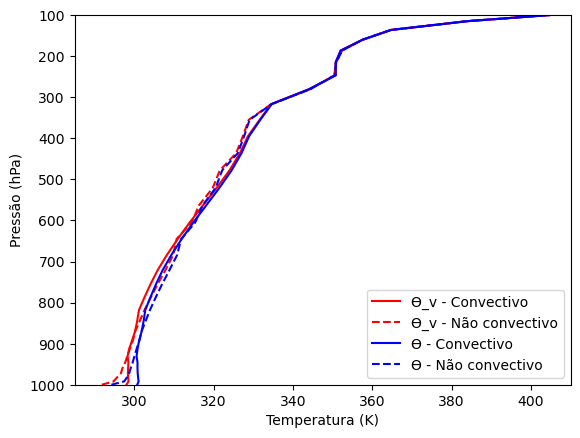

In [148]:
plt.plot(theta_v, press,'r', label = '\u03F4_v - Convectivo')
plt.plot(theta_v1, press,'r',linestyle='dashed', label = '\u03F4_v - Não convectivo')

plt.plot(theta, press,'b', label = '\u03F4 - Convectivo')
plt.plot(theta1, press,'b',linestyle='dashed', label = '\u03F4 - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(285,410)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()


# Pressão do Vapor

[24.053290486335754 22.112398493997752 21.689119483828545
 21.119335084527734 19.92755303833261 19.11074671813473 18.53739816981554
 16.960529440516606 14.025681813172996 12.71601002277434 11.99076899588108
 11.384600363187491 10.263737154979257 9.027951025001705 7.777996784210205
 6.597246521651745 5.518749942839146 4.595658496641554 3.7513575091352687
 2.9502056296560912 2.1363827698845417 1.392034780454356
 0.9455276653878391 0.4935335706342012 0.2886511606671847
 0.12743197608506307 0.13054834953253158 0.050981831623983453
 0.022856411578366532 0.01098839741673146 0.004357304564728111
 0.0012330798929324374 0.0007498161281546345 0.00027510393529587424
 0.00024650804683278694 5.1841017533661216e-05 0.00031405963156885266
 0.0011393386377894785 0.001419341502827592 0.0010709107282746118
 0.0005183820229867706 0.0002591910114933853]


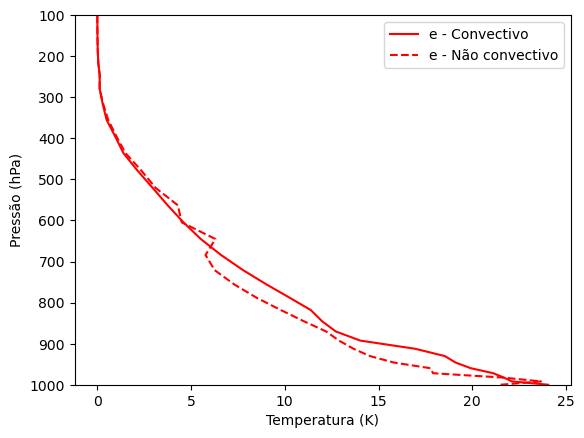

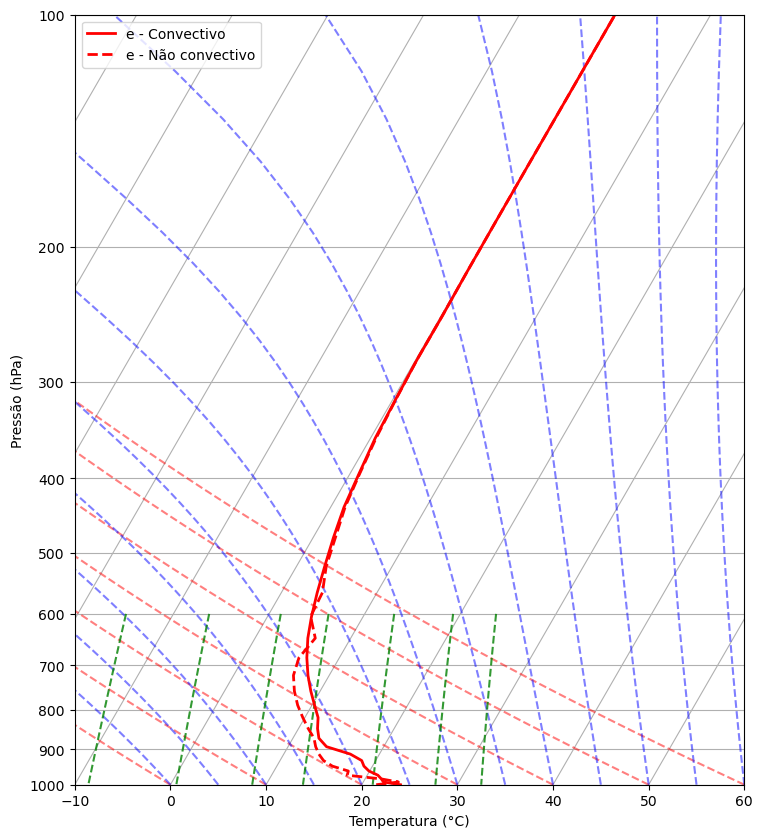

In [129]:
# Convectivo
e = press * (q / (q + 0.622))
print(e)
# Não convectivo
e1 = press1 * (q1 / (q1 + 0.622))

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(e, press,'r', label = 'e - Convectivo')
plt.plot(e1, press,'r',linestyle='dashed', label = 'e - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
#ax.set_xlim(270,300)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, e, 'r', linewidth=2)
skew.plot(press, e1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-10, 60) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['e - Convectivo', 'e - Não convectivo'])
skew.ax.set_xlabel('Temperatura (°C)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


# Pressão de Vapor de Saturação

[3.6945385e+01 3.6175739e+01 3.4256325e+01 3.2222374e+01 3.0124191e+01
 2.7978128e+01 2.5309544e+01 2.3251949e+01 2.1225431e+01 1.9303415e+01
 1.7079805e+01 1.4723730e+01 1.3014930e+01 1.1319838e+01 9.7275848e+00
 8.3464470e+00 7.0842409e+00 5.9094505e+00 4.8248219e+00 3.7742445e+00
 2.7783761e+00 1.8712224e+00 1.1441915e+00 6.9939411e-01 4.0214461e-01
 3.4100479e-01 2.2462651e-01 8.4663503e-02 3.1475332e-02 1.4546534e-02
 6.9091045e-03 7.4076005e-03 1.1388289e-02 1.4825197e-02 3.1376358e-02
 4.3667916e-02 4.7916964e-02 4.5795985e-02 4.5276746e-02 7.8244023e-02
 1.6545400e-01 1.2902482e+00]


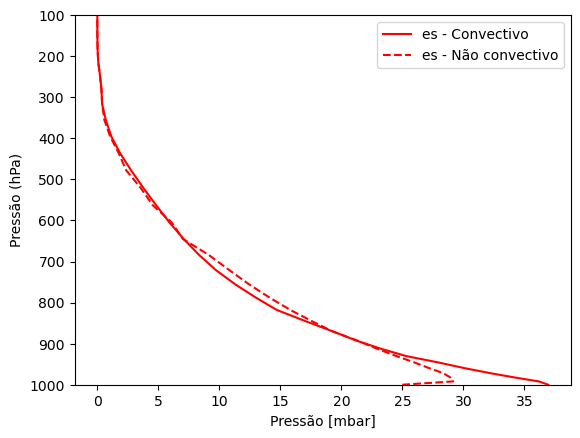

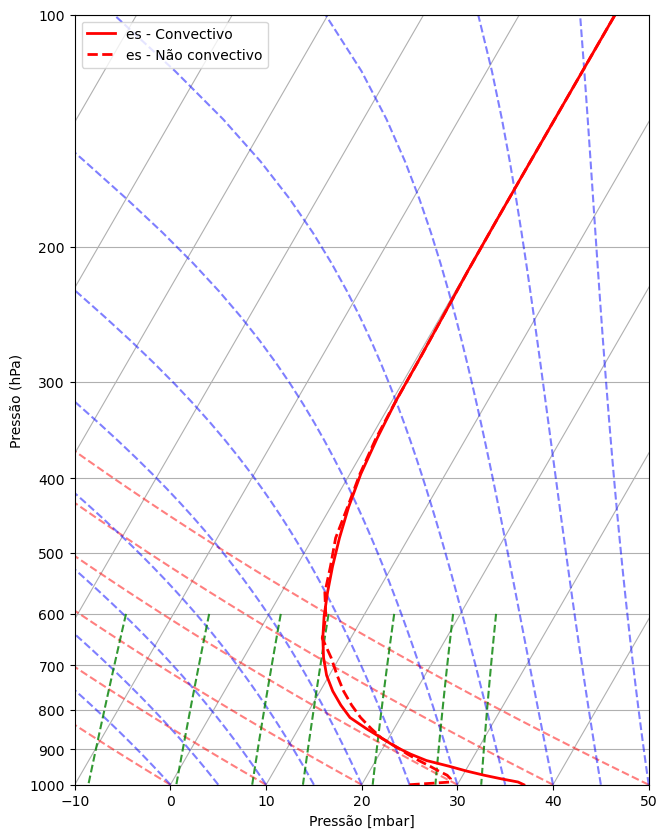

In [140]:
# Convectivo
es = 6.112 * 10 ** ((7.5 * (temp -273.15)) / ((temp -273.15) + 237.3))
esC = es# - 273.15
print(esC)
# Não convectivo
es1 = 6.112 * 10 ** ((7.5 * (temp1 -273.15)) / ((temp1 -273.15) + 237.3))
esC1 = es1# - 273.15

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(es, press,'r', label = 'es - Convectivo')
plt.plot(es1, press,'r',linestyle='dashed', label = 'es - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
#ax.set_xlim(265,300)
ax.set_xlabel('Pressão [mbar]')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, esC, 'r', linewidth=2)
skew.plot(press, esC1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-10, 50) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['es - Convectivo', 'es - Não convectivo'])
skew.ax.set_xlabel('Pressão [mbar]')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


# Umidade Específica de Saturação

[22.980029457092286 22.684372725233946 21.683534918905725
 20.619200598972306 19.520751376769148 18.39588399658722
 16.922599775315156 15.849565282820366 14.791887740690443
 13.797327708298594 12.565810634366136 11.193947348895145
 10.269713241975214 9.31490221141009 8.390872916724993 7.58883260299921
 6.82988797907086 6.0788671913963 5.330348044051062 4.508577255202193
 3.613841685899819 2.668969694932125 1.802547255839739 1.225845462837684
 0.7899432428705786 0.7562483641052898 0.5666152575424988
 0.24476385568316797 0.10511154688452488 0.0565754636611836
 0.03157345542220144 0.04016884787825038 0.0740953518864874
 0.11727870190448479 0.3066977001187443 0.5384047708866655
 0.7663560057393852 0.9893408724709529 1.4082476301471738
 3.9372042975141417 17.935236693259604 279.7261599091629]


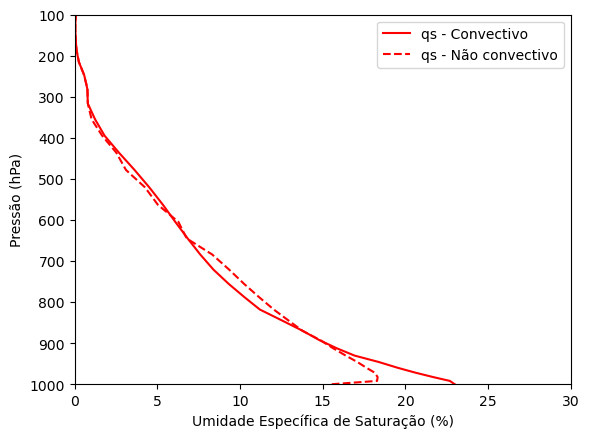

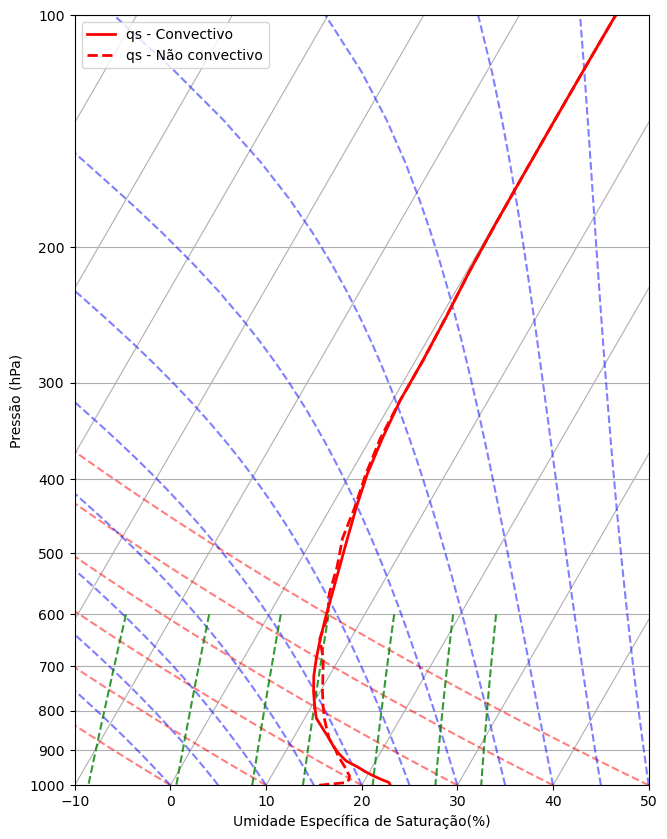

In [142]:
# Convectivo
qs = 0.622 * (es / (press/1000))
qsC = qs# - 273.15
print(qs)
# Não convectivo
qs1 = 0.622 * (es1 / (press1/1000))
qsC1 = qs1# - 273.15

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(qs, press,'r', label = 'qs - Convectivo')
plt.plot(qs1, press,'r',linestyle='dashed', label = 'qs - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(0,30)
ax.set_xlabel('Umidade Específica de Saturação (%)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, qsC, 'r', linewidth=2)
skew.plot(press, qsC1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-10, 50) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['qs - Convectivo', 'qs - Não convectivo'])
skew.ax.set_xlabel('Umidade Específica de Saturação(%)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


# Umidade Relativa

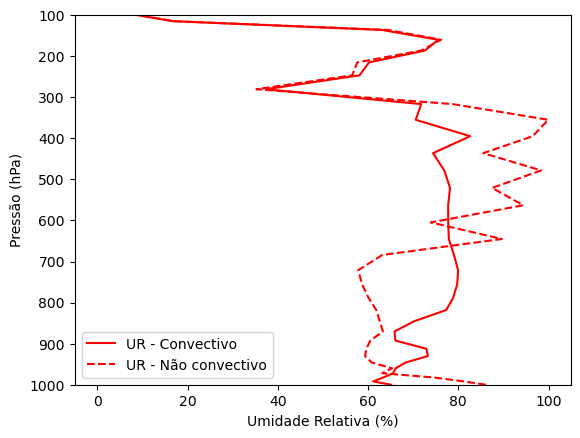

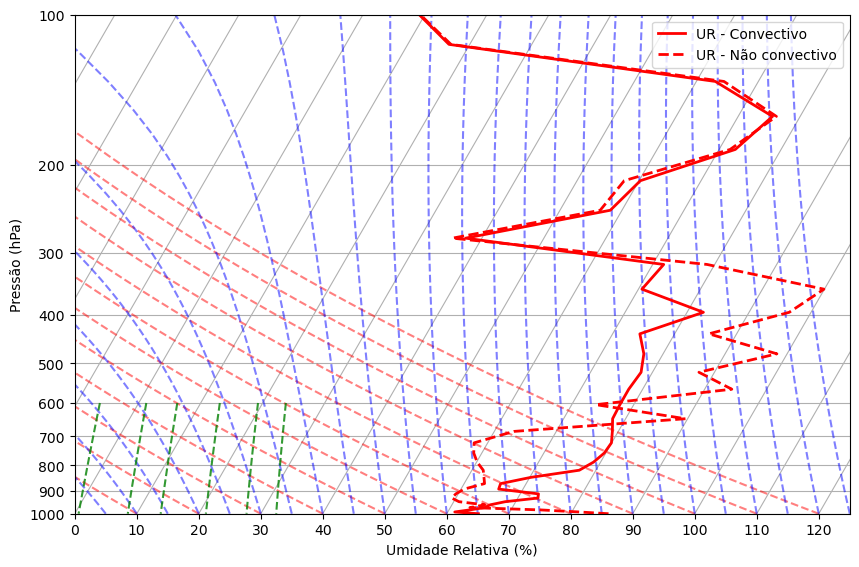

In [132]:
# Convectivo
UR = (e / es) * 100
# Não convectivo
UR1 = (e1 / es1) * 100
# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(UR, press,'r', label = 'UR - Convectivo')
plt.plot(UR1, press,'r',linestyle='dashed', label = 'UR - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
#ax.set_xlim(265,300)
ax.set_xlabel('Umidade Relativa (%)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, UR, 'r', linewidth=2)
skew.plot(press, UR1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(0, 125) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['UR - Convectivo', 'UR - Não convectivo'])
skew.ax.set_xlabel('Umidade Relativa (%)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


# Densidade do Ar

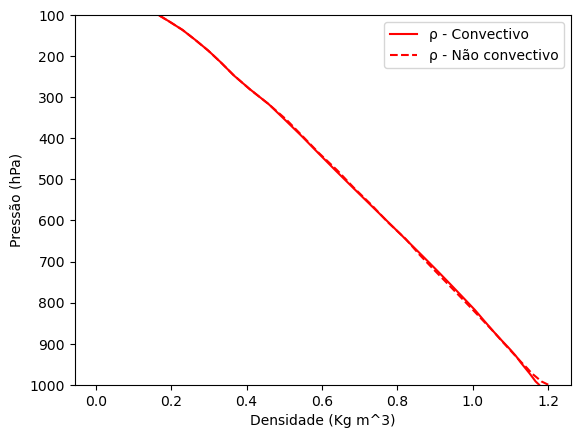

In [133]:
# Convectivo
rho_d = press / (287.058 * temp)
rho_v = e / (461.495 * temp)
rho = rho_d + rho_v
#print(rho)

# Não convectivo
rho_d1 = press1 / (287.058 * temp1)
rho_v1 = e1 / (461.495 * temp1)
rho1 = rho_d1 + rho_v1
#print(rho1)
# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(rho*100, press,'r', label = '\u03C1 - Convectivo')
plt.plot(rho1*100, press,'r',linestyle='dashed', label = '\u03C1 - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
#ax.set_xlim(265,300)
ax.set_xlabel('Densidade (Kg m^3)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
#fig = plt.figure(figsize=(10, 10))
#skew = SkewT(fig)
#skew.plot(press, rho, 'r', linewidth=2)
#skew.plot(press, UR1, 'r',linestyle='dashed', linewidth=2)
#skew.ax.set_ylim(1000, 100)
#skew.ax.set_xlim(0, 125) 
#skew.ax.legend(['UR - Convectivo', 'UR - Não convectivo'])
#skew.ax.set_xlabel('Umidade Relativa (%)')
#skew.ax.set_ylabel('Pressão (hPa)')
#plt.show()


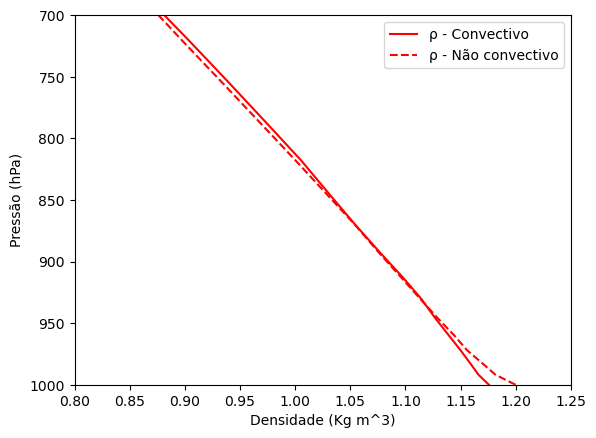

In [134]:
# Convectivo
rho_d = press / (287.058 * temp)
rho_v = e / (461.495 * temp)
rho = rho_d + rho_v
#print(rho)

# Não convectivo
rho_d1 = press1 / (287.058 * temp1)
rho_v1 = e1 / (461.495 * temp1)
rho1 = rho_d1 + rho_v1
#print(rho1)
# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(rho*100, press,'r', label = '\u03C1 - Convectivo')
plt.plot(rho1*100, press,'r',linestyle='dashed', label = '\u03C1 - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,700)
ax.set_xlim(0.8,1.25)
ax.set_xlabel('Densidade (Kg m^3)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
#fig = plt.figure(figsize=(10, 10))
#skew = SkewT(fig)
#skew.plot(press, rho, 'r', linewidth=2)
#skew.plot(press, UR1, 'r',linestyle='dashed', linewidth=2)
#skew.ax.set_ylim(1000, 100)
#skew.ax.set_xlim(0, 125) 
#skew.ax.legend(['UR - Convectivo', 'UR - Não convectivo'])
#skew.ax.set_xlabel('Umidade Relativa (%)')
#skew.ax.set_ylabel('Pressão (hPa)')
#plt.show()


# Temperatura Potencial Equivalente

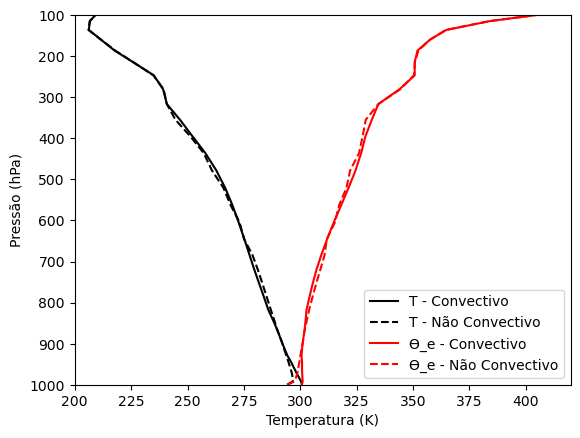

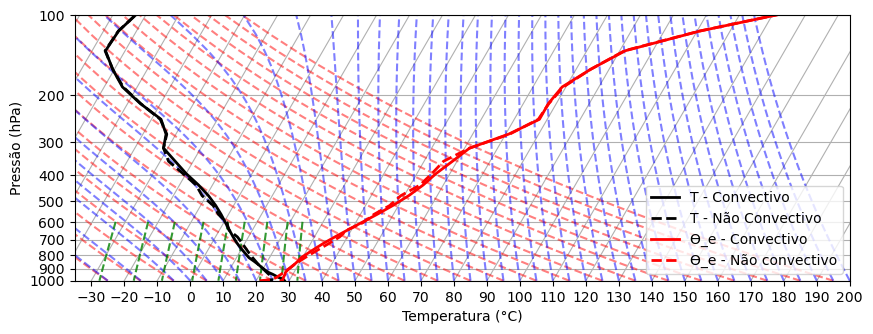

In [135]:
# Convectivo
thet = theta + ((L/cp)*mix)*(1000/press)**0.286
#theta_e = theta * ((L * es) / (cp * temp1))
theta_e = thet -273.15
# Não convectivo
thet1 = theta1 + ((L/cp)*mix)*(1000/press1)**0.286
theta_e1 = thet1 -273.15
# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(temp, press,'black', label = 'T - Convectivo')
plt.plot(temp1, press,'black',linestyle='dashed', label = 'T - Não Convectivo')
plt.plot(thet, press,'r', label = '\u03F4_e - Convectivo')
plt.plot(thet1, press,'r',linestyle='dashed', label = '\u03F4_e - Não Convectivo')

#plt.plot(UR1, press,'r',linestyle='dashed', label = '\u03F4 - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(200,420)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, temp-272.15, 'black', linewidth=2)
skew.plot(press, temp1-272.15, 'black',linestyle='dashed', linewidth=2)
skew.plot(press, theta_e, 'r', linewidth=2)
skew.plot(press, theta_e1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-35, 200) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['T - Convectivo','T - Não Convectivo','\u03F4_e - Convectivo', '\u03F4_e - Não convectivo'])
skew.ax.set_xlabel('Temperatura (°C)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


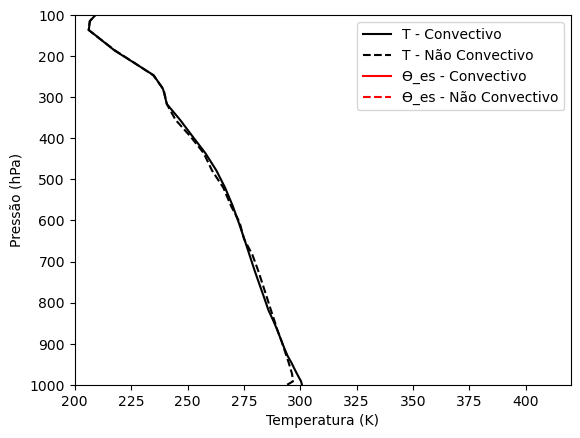

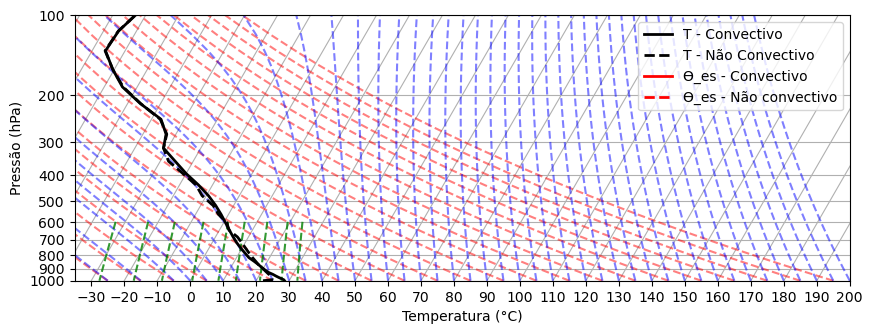

In [143]:
# Convectivo
thet = theta + ((L/cp)*mix)*(1000/press)**0.286
#theta_e = theta * ((L * es) / (cp * temp1))
theta_e = thet -273.15
# Não convectivo
thet1 = theta1 + ((L/cp)*mix)*(1000/press1)**0.286
theta_e1 = thet1 -273.15
# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(temp, press,'black', label = 'T - Convectivo')
plt.plot(temp1, press,'black',linestyle='dashed', label = 'T - Não Convectivo')
plt.plot(thet, press,'r', label = '\u03F4_es - Convectivo')
plt.plot(thet1, press,'r',linestyle='dashed', label = '\u03F4_es - Não Convectivo')

#plt.plot(UR1, press,'r',linestyle='dashed', label = '\u03F4 - Não convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(200,420)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, temp-272.15, 'black', linewidth=2)
skew.plot(press, temp1-272.15, 'black',linestyle='dashed', linewidth=2)
skew.plot(press, theta_e, 'r', linewidth=2)
skew.plot(press, theta_e1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-35, 200) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['T - Convectivo','T - Não Convectivo','\u03F4_es - Convectivo', '\u03F4_es - Não convectivo'])
skew.ax.set_xlabel('Temperatura (°C)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()


# Energia Estática Seca & Energia Estática Úmida e Saturada

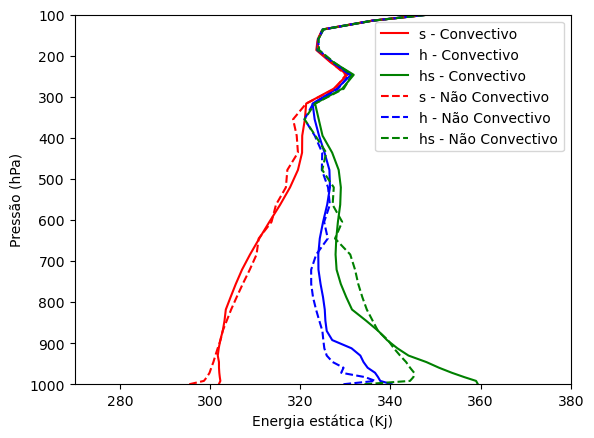

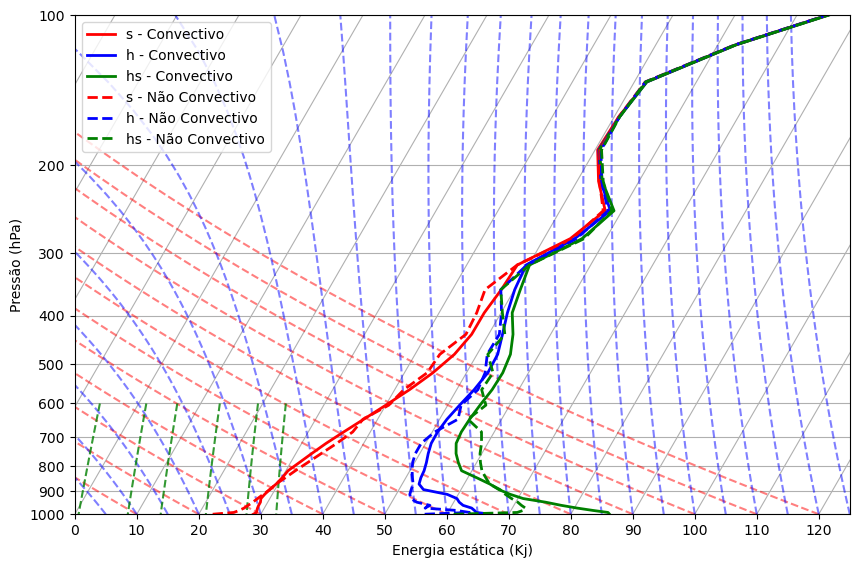

In [136]:
g = 9.80665
Cp = 1005.0 # J/(kg K)
lapse = 0.0098 # lapse rate em k/m
# Convectivo ---------------------------------------------------------
#h = (lapse * Rd / g)
#z = (ts / lapse) * (1 - ((press / 1000) ** (h)))
z = np.log(1000 / press) * (Rd * temp) / g
ess = (temp / lapse) * (1 - ((press / 1000) ** ((lapse * Rd / g))))
#ep = z + (temp1 * Cp / g)
ep = (temp * cp) + (z * g) # estática seca
epu = ep + L * q #estática úmida
eps = ep + L * (qs/1000) #estática saturada

ep1 = ep / 1000
ep2 = epu / 1000
ep3 = eps / 1000
# Não convectivo -------------------------------------------------------
z1 = np.log(1000 / press1) * (Rd * temp1) / g
ess1 = (temp1 / lapse) * (1 - ((press1 / 1000) ** ((lapse * Rd / g))))
#ep = z + (temp1 * Cp / g)
ep10 = (temp1 * cp) + (z1 * g) # estática seca
epu1 = ep10 + L * q1 #estática úmida
eps1 = ep10 + L * (qs1/1000) #estática saturada

ep11 = ep10 / 1000
ep21 = epu1 / 1000
ep31 = eps1 / 1000

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
plt.plot(ep1, press,'r', label = 's - Convectivo')
plt.plot(ep2, press,'b', label = 'h - Convectivo')
plt.plot(ep3, press,'g', label = 'hs - Convectivo')
plt.plot(ep11, press,'r', linestyle='dashed',label = 's - Não Convectivo')
plt.plot(ep21, press,'b', linestyle='dashed',label = 'h - Não Convectivo')
plt.plot(ep31, press,'g', linestyle='dashed',label = 'hs - Não Convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,100)
ax.set_xlim(270,380)
ax.set_xlabel('Energia estática (Kj)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

# -----------------------------------------
# Plot ------------------------------------
# -----------------------------------------
fig = plt.figure(figsize=(10, 10))
skew = SkewT(fig)
skew.plot(press, ep1-273.15, 'r', linewidth=2)
skew.plot(press, ep2-273.15, 'b', linewidth=2)
skew.plot(press, ep3-273.15, 'g', linewidth=2)
skew.plot(press, ep11-273.15, 'r',linestyle='dashed', linewidth=2)
skew.plot(press, ep21-273.15, 'b',linestyle='dashed', linewidth=2)
skew.plot(press, ep31-273.15, 'g',linestyle='dashed', linewidth=2)
#skew.plot(press, ep111-273.15, 'r',linestyle='dashed', linewidth=2)
#skew.plot(press, ep21-273.15, 'b',linestyle='dashed', linewidth=2)
#skew.plot(press, theta_e, 'r', linewidth=2)
#skew.plot(press, theta_e1, 'r',linestyle='dashed', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(0, 125) 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['s - Convectivo','h - Convectivo','hs - Convectivo', 's - Não Convectivo','h - Não Convectivo','hs - Não Convectivo',])
skew.ax.set_xlabel('Energia estática (Kj)')
skew.ax.set_ylabel('Pressão (hPa)')
plt.show()

#### fazer a energia estática satura e úmida diferentes

# Plotando as temperaturas

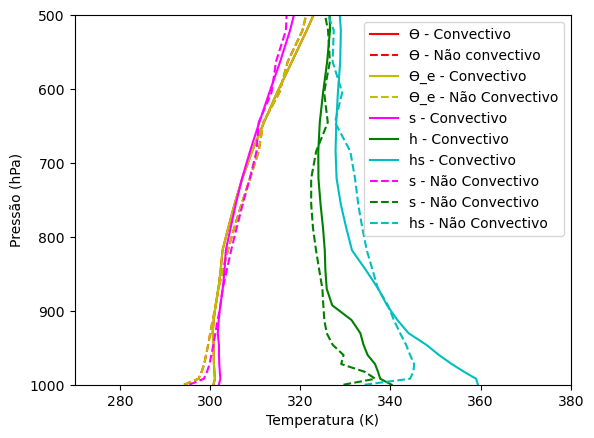

In [139]:
#plt.plot(temp, press,'black', label = 'T - Convectivo')
#plt.plot(temp1, press,'black',linestyle='dashed', label = 'T - Não Convectivo')

plt.plot(theta, press,'r', label = '\u03F4 - Convectivo')
plt.plot(theta1, press,'r',linestyle='dashed', label = '\u03F4 - Não convectivo')

#plt.plot(theta_v, press,'b', label = '\u03F4_v - Convectivo')
#plt.plot(theta_v1, press,'b',linestyle='dashed', label = '\u03F4_v - Não convectivo')

plt.plot(thet, press,'y', label = '\u03F4_e - Convectivo')
plt.plot(thet1, press,'y',linestyle='dashed', label = '\u03F4_e - Não Convectivo')

plt.plot(ep1, press,'magenta', label = 's - Convectivo')
plt.plot(ep2, press,'g', label = 'h - Convectivo')
plt.plot(ep3, press,'c', label = 'hs - Convectivo')

plt.plot(ep11, press,'magenta',linestyle='dashed', label = 's - Não Convectivo')
plt.plot(ep21, press,'g',linestyle='dashed', label = 's - Não Convectivo')
plt.plot(ep31, press,'c',linestyle='dashed', label = 'hs - Não Convectivo')

plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,500)
ax.set_xlim(270,380)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

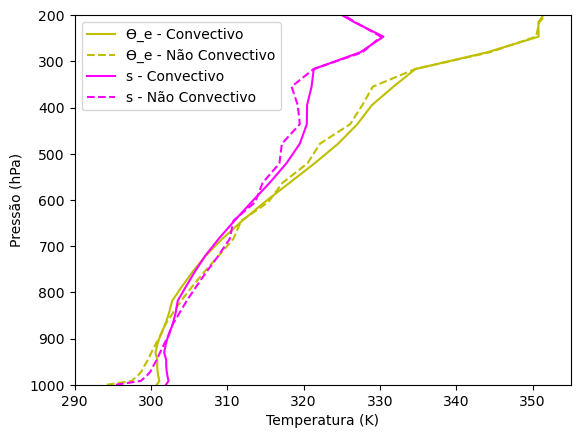

In [97]:
plt.plot(thet, press,'y', label = '\u03F4_e - Convectivo')
plt.plot(thet1, press,'y',linestyle='dashed', label = '\u03F4_e - Não Convectivo')

plt.plot(ep1, press,'magenta', label = 's - Convectivo')
plt.plot(ep111, press,'magenta',linestyle='dashed', label = 's - Não Convectivo')
plt.legend()
ax = plt.gca()
ax.invert_yaxis()
ax.set_ylim(1000,200)
ax.set_xlim(290,355)
ax.set_xlabel('Temperatura (K)')
ax.set_ylabel('Pressão (hPa)')
plt.show()

Tem equivalência entre theta_e e s, quando usa-se cada um? ambas são conservativas, theta_e tem umidade (q) e s não tem umidade (q). Quando não tem umidade, qualquer um vale ser utilizado. Em casos reversiveis, como nuvens convectivas pode usar theta_e. E h em processos irreversíveis. 